# Example usage of Stokes Class

In [1]:
import numpy as np
import pybbtd.stokes as stokes
import pybbtd.btd as btd
import pybbtd as pybbtd
from pybbtd.visualization import draw_metrics, stokes_draw

%load_ext autoreload
%autoreload 2

In [2]:
# Create Stokes model
R = 2
L = 3
btd.validate_R_L(R, L)
X = stokes.Stokes([15, 15], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (15, 15, 4) on LL1 mode.


In [3]:
# Create ground truth tensor
[A0, B0, C0], T0 = X.generate_stokes_tensor()

In [4]:
# theta is the constraint matrix to represent a BTD-LL1 model as a CPD model
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 1e-6 * np.random.randn(*X.dims)
# or simply use
# Tnoisy = T0 +  1e-6 * np.random.randn(*X.dims)

In [5]:
stokes.validate_stokes_tensor(Tnoisy)

All pixels satisfy the Stokes constraints.


In [11]:
np.random.seed(15)
X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="kmeans",
    max_iter=20000,
    rho=1,
    max_admm=30,
    rel_tol=10**-8,
    abs_tol=10**-14,
    admm_tol=10**-10,
)

Exiting early due to unsufficient decrease of cost


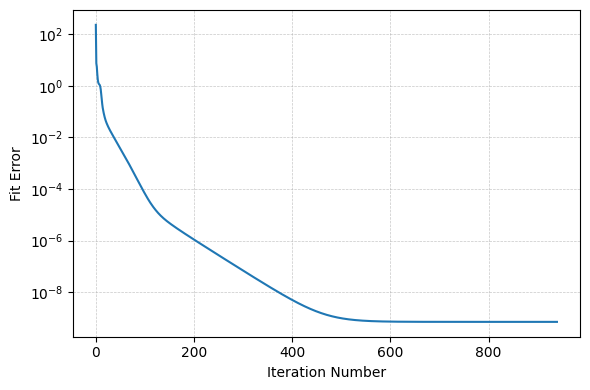

In [12]:
draw_metrics.plot_error(X.fit_error)

# Example with BBTD board

In [7]:
tensor = np.load("data/BBTD_board.npy")

# Create Stokes model
R = 5
L = 25
btd.validate_R_L(R, L)
X = stokes.Stokes([tensor.shape[0], tensor.shape[1]], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (160, 160, 4) on LL1 mode.


In [ ]:
X.fit(
    data=tensor,
    algorithm="ADMM",
    init="kmeans",
    max_iter=5000,
    rho=1,
    max_admm=2,
    rel_tol=10**-5,
    abs_tol=10**-7,
    admm_tol=10**-5,
)

Progress: 20.0 %


KeyboardInterrupt: 

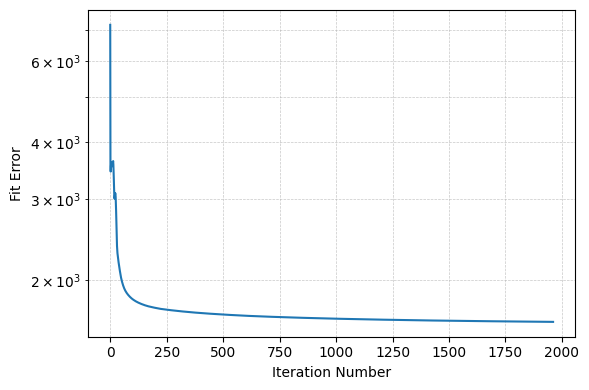

In [11]:
draw_metrics.plot_error(X.fit_error)

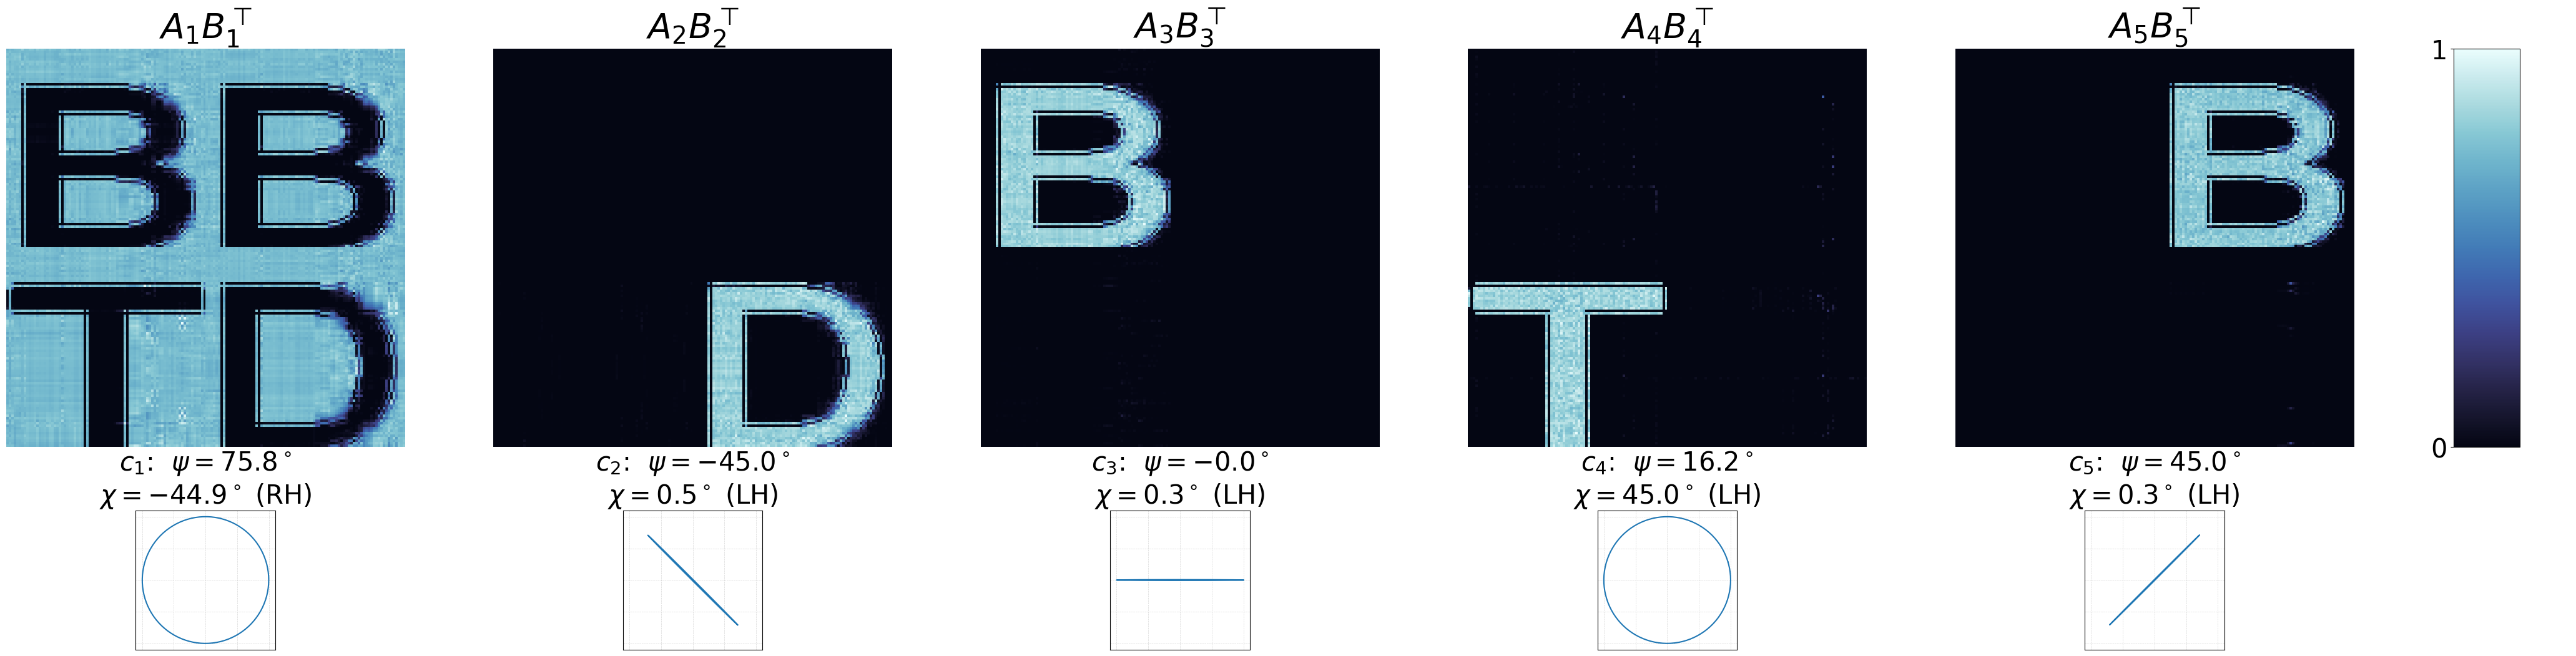

In [12]:
Afit, Bfit, Cfit = X.factors[0], X.factors[1], X.factors[2]
stokes_draw.plot_Stokes_terms(Afit, Bfit, Cfit, R, L)